# Distortion overview

Colors:
blue:           0,105,170       #0069aa
red:            200,80,60       #c8503c
green:          50,110,30       #326e1e

orange:         210,150,0       #d29600
violet:         175,110,150     #af6e96
light blue:     80,170,200      #50aac8

light green:    130,185,160     #82b9a0
brown:          215,180,105     #d7b469
grey:           216,221,222     #d8ddde
dark grey:      33,26,30        #211a1e
yellow:         240,228,66      #f0e442

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
# actively reload module (during working on analyse_embeddings.py)
import importlib
import matplotlib.image as mpimg
import mat73
font = {'family' : 'Helvetica',
        #'sans-serif': ['Helvetica'],
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

### COLOR definitions ###
#colors of undistorted and distorted mesh
color_undist = np.array([0,105,170])/255
color_dist = np.array([200,80,60])/255

# for yaw, pitch and roll
colors_ypr = [ np.array([210,150,0])/255,
               np.array([80,170,200])/255,
               np.array([175,110,150])/255]

# for undistorted, add 1 add 3
colors_add1 =  np.array([50,110,30])/255
colors_add3 =  np.array([200,80,60])/255

colors_add1 = sb.blend_palette(['#214017','#326e1e','#4ad41c'],13)
colors_add3 = sb.blend_palette(['#994738','#ee5c43','#ed8e7d'],13)

color_dynobs = np.array([130,185,160])/255
color_statobs = np.array([215,180,105])/255
 #sb.color_palette("Oranges")



#f6bd60, #139a43, #0eb1d2, #805d93, #c05746


## FoV size of virtual frame
fov = [58, 58, 41, 39] # left, right, bottom, top extent of fov in degree


In [14]:
colors_add3

[(0.6, 0.2784313725490196, 0.2196078431372549),
 (0.6549019607843137, 0.29199538638985006, 0.22671280276816608),
 (0.7098039215686275, 0.3055594002306805, 0.23381776239907728),
 (0.7673202614379084, 0.31976931949250287, 0.24126105344098425),
 (0.8222222222222222, 0.3333333333333333, 0.24836601307189543),
 (0.8771241830065359, 0.34689734717416376, 0.2554709727028066),
 (0.9333179546328335, 0.36155324875048056, 0.2636370626682045),
 (0.9326720492118417, 0.3938485198000769, 0.30109957708573626),
 (0.9320261437908497, 0.4261437908496732, 0.338562091503268),
 (0.9313494809688582, 0.45997693194925027, 0.3778085351787774),
 (0.9307035755478662, 0.4922722029988466, 0.4152710495963091),
 (0.9300576701268743, 0.524567474048443, 0.4527335640138408),
 (0.9294117647058824, 0.5568627450980392, 0.49019607843137253)]

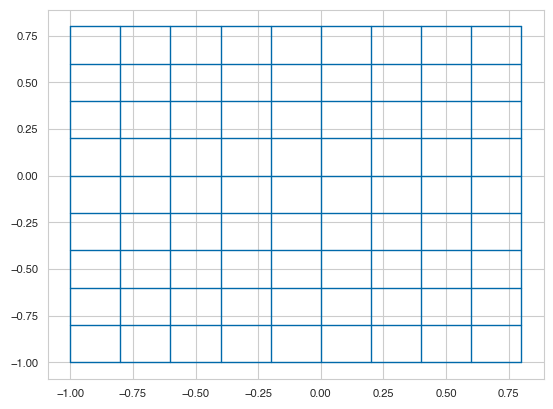

In [15]:
# function for plotting meshes
def meshplot(ax,x,y,clr,lw = 1.0):
    for k in range(y.shape[0]):
        ax.plot(x[k,:],y[k,:],color=clr,linewidth = lw)
    for k in range(x.shape[1]):
        ax.plot(x[:,k],y[:,k],color=clr,linewidth = lw)

[xm,ym] = np.meshgrid(np.arange(-1,1,0.2),np.arange(-1,1,0.2))

f,ax = plt.subplots()
meshplot(ax,xm,ym,color_undist)

In [18]:
def distort_image(img,mesh_df,x_lim,y_lim):
    from scipy.ndimage import map_coordinates

    # create sampling points in the resolution of the input image with world dimension given by x_lim and y_lim
    xrange = np.linspace(x_lim[0],x_lim[-1],img.shape[1])
    yrange = np.linspace(y_lim[0],y_lim[-1],img.shape[0])
    [xs,ys] = np.meshgrid(xrange,yrange)
    ys = np.flipud(ys)

    # interpolating image plane coordinates for defined sampling points
    xu = sp.interpolate.griddata(mesh_df[['dist_x','dist_y']],mesh_df['orig_x'],(xs,ys),method='cubic') # TODO: check different interp options
    yu = sp.interpolate.griddata(mesh_df[['dist_x','dist_y']],mesh_df['orig_y'],(xs,ys),method='cubic') # TODO: check different interp options

    ## transform (xu,y) from image plane space to pixel space (row,col)
    im_col = (xu - xrange[ 0])/(xrange[-1] - xrange[0])*img.shape[1]
    im_row = (-yu +yrange[-1])/(yrange[-1] - yrange[0])*img.shape[0]

    # Interpolate the values for each color channel at the calculated coordinates
    # We have to flatten the coordinates first and then reshape the 1d output for each channel
    r_interpolated = map_coordinates(img[:,:,0], [im_row.flatten(),im_col.flatten()],mode = 'constant',cval=255.0).reshape(img.shape[0:2])
    g_interpolated = map_coordinates(img[:,:,1], [im_row.flatten(),im_col.flatten()],mode = 'constant',cval=255.0).reshape(img.shape[0:2])
    b_interpolated = map_coordinates(img[:,:,2], [im_row.flatten(),im_col.flatten()],mode = 'constant',cval=255.0).reshape(img.shape[0:2])

    img_distorted = np.stack([r_interpolated, g_interpolated, b_interpolated], axis=-1) #  stack color channels at last dimension

    return img_distorted

In [12]:
img = mpimg.imread('./distortion_overview/indoor2_hallway.jpg')
img.shape

(4480, 6720, 3)

../mesh_input/SM-5A1/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM-5A3/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM-2.5A1/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM-2.5A3/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM0A1/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM0A3/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM2.5A1/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM2.5A3/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM5A1/mesh.mat
(xd,yd) interpolation for meshplot
../mesh_input/SM5A3/mesh.mat
(xd,yd) interpolation for meshplot


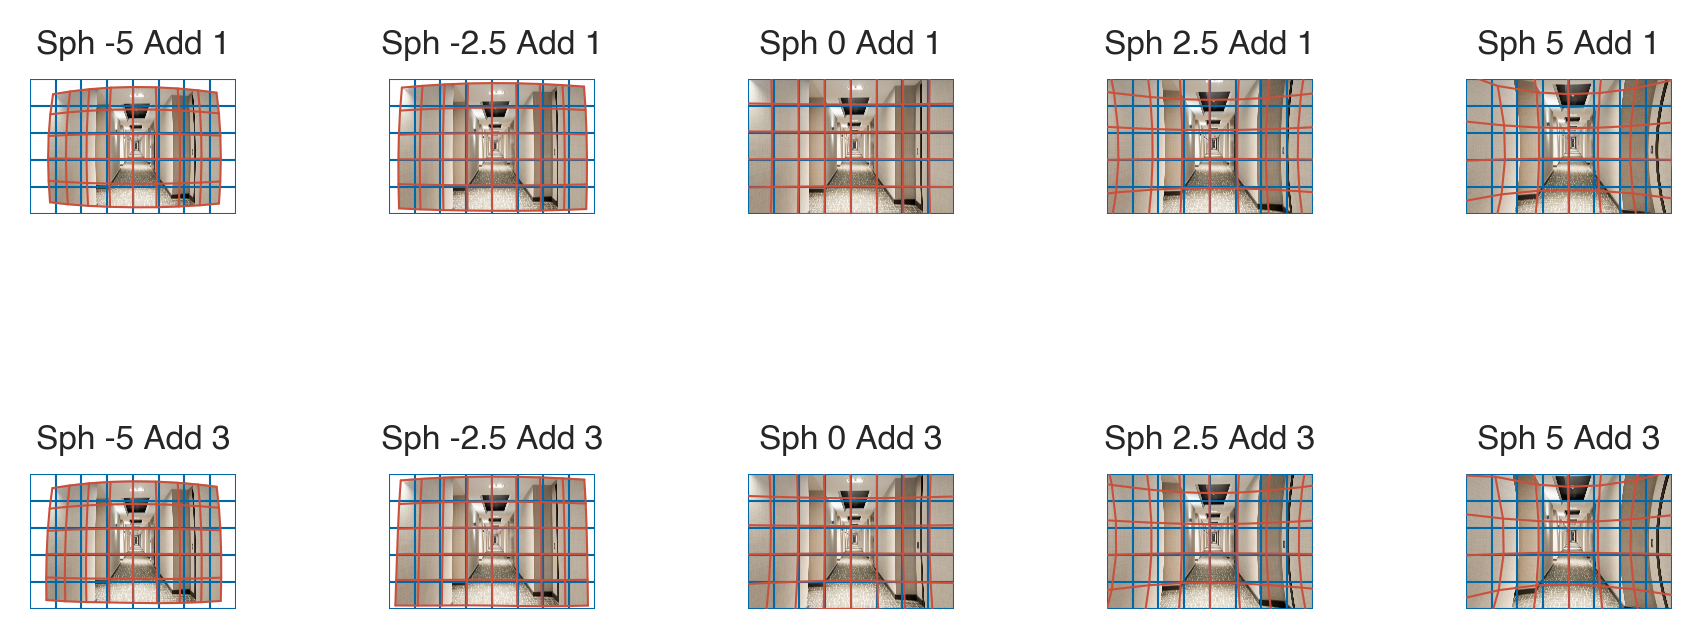

In [21]:
import matplotlib.image as mpimg
import scipy.ndimage # for image distortions
img = mpimg.imread('./distortion_overview/indoor2_hallway.jpg')

cm = 1/2.54
fig, ax = plt.subplots(2,5,figsize=(15.5*cm, 7*cm),dpi = 300)
plt.tight_layout()


# list of lenses and their corresponding refraction values
lens_list = ['SM-5A1','SM-5A3','SM-2.5A1','SM-2.5A3','SM0A1','SM0A3','SM2.5A1','SM2.5A3','SM5A1','SM5A3']
sph = [-5, -5, -2.5, -2.5, 0, 0, 2.5, 2.5, 5,5]
add = [1, 3, 1, 3, 1, 3, 1, 3, 1, 3]

# predefine meshgrid for sampling points of 2d interpolation
xrange = np.linspace(-np.tan(np.radians(50)),np.tan(np.radians(50)),9)
yrange = np.linspace(-np.tan(np.radians(39)),np.tan(np.radians(37)),6)
[x,y] = np.meshgrid(xrange,yrange)

# image transformation
xrange = np.linspace(-np.tan(np.radians(50)),np.tan(np.radians(50)),img.shape[1])
yrange = np.linspace(-np.tan(np.radians(39)),np.tan(np.radians(37)),img.shape[0])
[xs,ys] = np.meshgrid(xrange,yrange)

fov = [50, 50, 39, 37] # left, right, bottom, top extent of fov in degree
fov_imgplane = np.tan(np.radians(fov))

fov_center = np.array([fov_imgplane[1] - fov_imgplane[0] , fov_imgplane[3] - fov_imgplane[2]])/2
fov_axes = np.array([fov_imgplane[0] + fov_imgplane[1] , fov_imgplane[2] + fov_imgplane[3]])/2

theta = np.linspace(0,2*np.pi,2000)
x_ellipse = fov_axes[0] * np.cos(theta) + fov_center[0]
y_ellipse = fov_axes[1] * np.sin(theta) + fov_center[1]

for col in range(5):
    for row in range(2):
        lens_index = col*2 + row
        file_path = '../mesh_input/' + lens_list[lens_index] + '/mesh.mat'
        print(file_path)
        mat = mat73.loadmat(file_path)
        mesh_df = pd.DataFrame()
        mesh_df['orig_x'] = mat['mesh_orig'][:,:,0].flatten()
        mesh_df['orig_y'] = mat['mesh_orig'][:,:,1].flatten()
        mesh_df['dist_x'] = mat['mesh_dist'][:,:,0].flatten()
        mesh_df['dist_y'] = mat['mesh_dist'][:,:,1].flatten()

        # clean up input by removing rows with at least one missing value
        mesh_df = mesh_df.dropna()
        # interpolation of forward transformation: find distorted point(xd,yd) for undistorted sampling point (xs,ys)
        print('(xd,yd) interpolation for meshplot')
        xd = sp.interpolate.griddata(mesh_df[['orig_x','orig_y']],mesh_df['dist_x'],(x,y),method='cubic') # TODO: check different interp options
        yd = sp.interpolate.griddata(mesh_df[['orig_x','orig_y']],mesh_df['dist_y'],(x,y),method='cubic') # TODO: check different interp options

        img_distorted = distort_image(img,mesh_df,[xrange[0],xrange[-1]] ,[yrange[0],yrange[-1]])

        ax[row,col].imshow(np.flipud(img_distorted),origin='lower',extent=(xrange[0],xrange[-1],yrange[0],yrange[-1]))
        meshplot(ax[row,col],x,y,color_undist,lw = 0.5)
        meshplot(ax[row,col],xd,yd,color_dist,lw = 0.5)

        ax[row,col].set_title('Sph ' + str(sph[lens_index]) + ' Add ' + str(add[lens_index]),fontdict = font)
        ax[row,col].set_xlim([xrange[0],xrange[-1]])
        ax[row,col].set_ylim([yrange[0],yrange[-1]])
        ax[row,col].axis('off')
        ax[row,col].set_aspect('equal')

plt.savefig('distortion_overview.svg', bbox_inches='tight', pad_inches = 0)